**Importing Libraries**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings('ignore')

**Merging Datasets into 1 dataset**

In [ ]:
data1=pd.read_csv('Part2 - Data1.csv')
data2=pd.read_csv('Part2 -Data2.csv')
df=pd.merge(data1,data2,left_on ="ID",right_on="ID")
print(df.shape)

(5000, 14)


In [ ]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
df.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**Data cleaning:**


---



In [ ]:
max_type_of_card_holders=df['LoanOnCard'].mode()[0] 
df['LoanOnCard']=df['LoanOnCard'].fillna(max_type_of_card_holders)
df['LoanOnCard']=df['LoanOnCard'].astype("int64")
df.drop(columns='ZipCode',axis=1,inplace=True)
df.drop(columns='ID',axis=1,inplace=True)

We are dropping the Zipcode and ID column for our analysis because it is irrelevant for our classification as to what the id of customer is or where the customer is from. For our analysis instead of dropping the NaN values, We replace the NaN values of the target column with the most occuring value in the target column.

In [ ]:
df.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Level,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Security,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
FixedDepositAccount,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
InternetBanking,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


**Data analysis & visualisation**

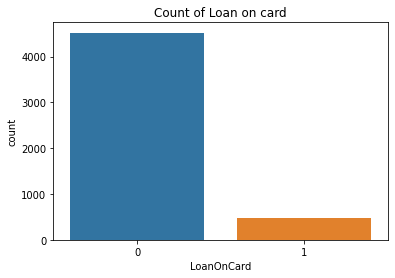

In [ ]:
columns=['FixedDepositAccount', 'InternetBanking', 'CreditCard','Mortgage']
ax1=sns.countplot(x=df['LoanOnCard']);
ax1.set_title('Count of Loan on card');


**We can easily conclude that more number of People dont have a loan on card**

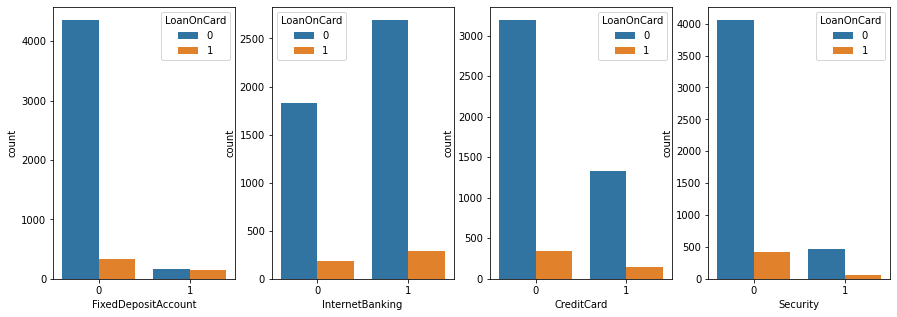

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
ax1=sns.countplot(x="FixedDepositAccount",hue="LoanOnCard",data=df)
plt.subplot(1,4,2)
ax2=sns.countplot(x= 'InternetBanking',hue="LoanOnCard",data=df)
plt.subplot(1,4,3)
ax3=sns.countplot(x='CreditCard',hue="LoanOnCard",data=df)
plt.subplot(1,4,4)
ax4=sns.countplot(x='Security',hue="LoanOnCard",data=df)



**From the plots for attributes with respect to the target variable we can derive following conclusions.**
*   ```There are more number of customers who dont have a fixed deposit and have a loan than the ones who have a fixed deposit.```
*   ```The people who do internet banking tend to have a loan on card.```
*   ```The people who dont have a credit card are more likely to have a loan on card.```
*   ```The people who dont have security deposited in bank are more likely to have a loan on card.```




**Data distribution of different labels**

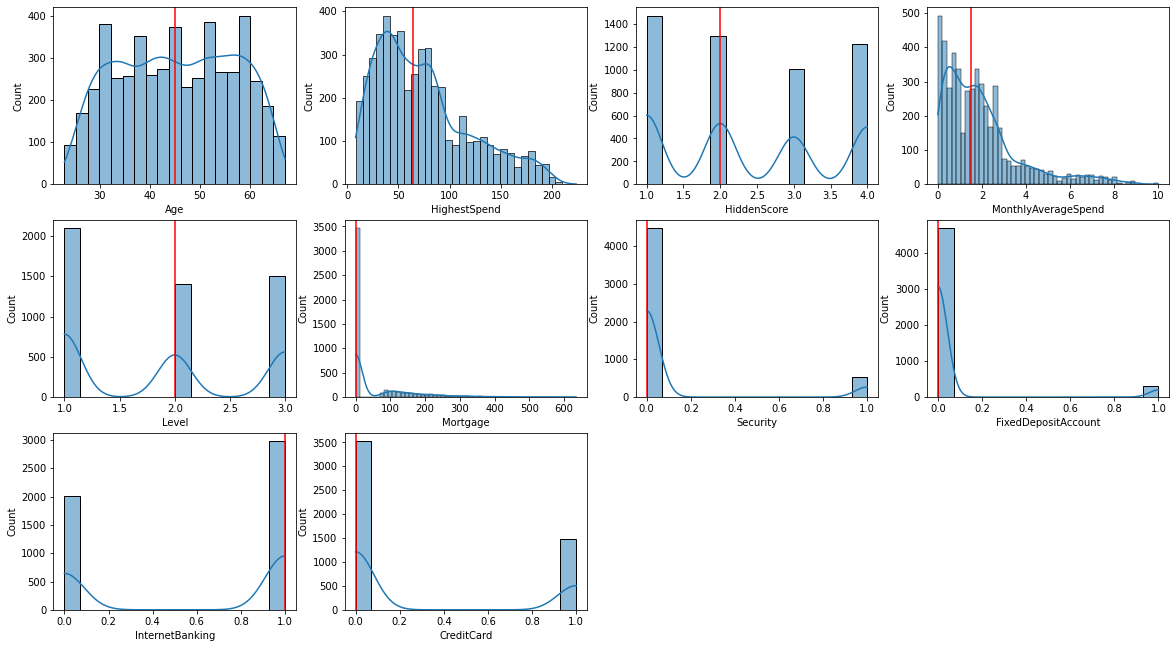

In [ ]:
columns=['Age', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard']
plt.figure(figsize=(20,15))
for i in range(len(columns)):
     col_median=df[df.columns[i]].median()
     plt.subplot(4,4,i+1)
     sns.histplot(data=df,x=df[df.columns[i]],kde=True)
     plt.axvline(col_median,0,1,color='red');

**Analysing the correlation of the fields**

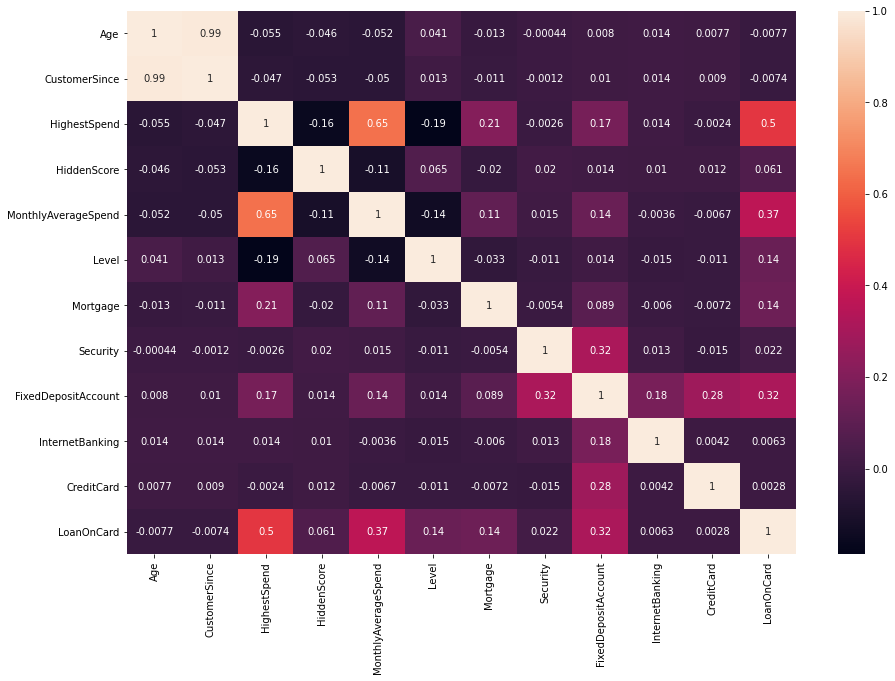

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

**We can easily state that age and CustomerSince column are highly correlated so we ought to drop this column for our model building as it may hinder our accuracy.**

**Data pre-processing:**


---



In [ ]:
df.drop(columns='CustomerSince',axis=1,inplace=True)

# Segregating predictors and target attributes
X=df.loc[:,:"CreditCard"]
y=df[["LoanOnCard"]]

#Standardization of data
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
X_std=pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns=X.columns

#Splitting data into train dataset and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=42,shuffle=True) 


**Model training, testing and tuning**

---


Classification used---->  GaussianNB
Accuracy---->  0.892
Recall Score---> 0.599
Precison Score---> 0.487
F1 Score---> 0.537


----------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



[Text(0, 0.5, 'No Loan'), Text(0, 1.5, 'Loan')]

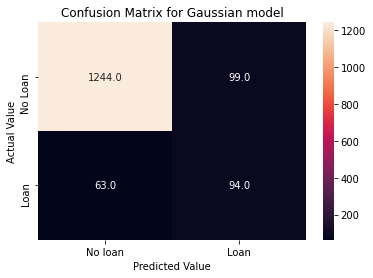

In [ ]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Classification used----> ",gnb.__class__.__name__)
print("Accuracy----> ",accuracy_score(y_test,y_pred))
print('Recall Score--->',np.round(recall_score(y_test,y_pred),3))
print('Precison Score--->',np.round(precision_score(y_test,y_pred),3))
print('F1 Score--->',np.round(f1_score(y_test,y_pred),3))
print("\n")
print('----------------------Classification Report------------------')
print(classification_report(y_test,y_pred))

matrix=confusion_matrix(y_test,y_pred);

ax=plt.subplot();
sns.heatmap(matrix,annot=True,fmt=".1f");
ax.set_title('Confusion Matrix for Gaussian model')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No loan','Loan'])
ax.yaxis.set_ticklabels(['No Loan','Loan'])

Classification used---->  LogisticRegression
Accuracy---->  0.952
Recall Score---> 0.662
Precison Score---> 0.846
F1 Score---> 0.743


----------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



[Text(0, 0.5, 'No Loan'), Text(0, 1.5, 'Loan')]

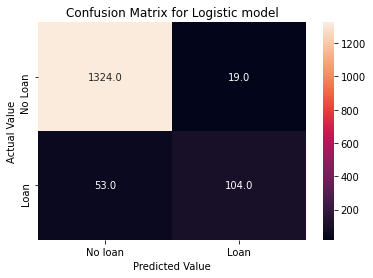

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train.values.ravel())
y_pred=lr.predict(X_test)
print("Classification used----> ",lr.__class__.__name__)
print("Accuracy----> ",accuracy_score(y_test,y_pred))
print('Recall Score--->',np.round(recall_score(y_test,y_pred),3))
print('Precison Score--->',np.round(precision_score(y_test,y_pred),3))
print('F1 Score--->',np.round(f1_score(y_test,y_pred),3))
print("\n")
print('----------------------Classification Report------------------')
print(classification_report(y_test,y_pred))

matrix=confusion_matrix(y_test,y_pred);

ax=plt.subplot();
sns.heatmap(matrix,annot=True,fmt=".1f");
ax.set_title('Confusion Matrix for Logistic model')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.xaxis.set_ticklabels(['No loan','Loan'])
ax.yaxis.set_ticklabels(['No Loan','Loan'])

**Inferences:**


---
* In case of Naive Bayes model, we fail to get predict a lot of people who were actually having loan on card and instead we get a good accuracy score so we should consider building a model with recall rather than accuracy for our model.

* In case of Logistic Regression Model, we have a pretty good accuracy and we get a nice precision score.

*   Precision for the Logistic Regression model is better than the Recall value whereas Recall score is better than Precision for Naive Bayes Model
*   We failed to predict correctly around 53 customers who actually were loan holders in case of Logistic Regression Model but we failed to predict large number of actual loan holders using Naive Bayes Model due to this large when we find the F1 Score for the models using formula.
F1 Score = 2*(Recall * Precision) / (Recall + Precision),
The Naive Bayes Model performs bad as compared to the Logistic Regression Model.

*   Most of the customers do not have loan account from the bank.
*   The Logistic Regression model gives a better accuracy as compared the Naive Bayes model.


*   Our best fit model for the data should be Logistic Regression Model.







**Suggestions:**

There are multiple columns in the dataset from which we do not have a clear understanding of how is that attribute contributing to the accuracy of opur model. There are multiple columns which are masked and therefore we fail to say what is the optimum value we should consider for our analysis.
